In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *


# 从模型到生产

我们在<<chapter_intro>>中看到的六行代码只是使用深度学习在实践中的一个小部分。在本章中，我们将使用一个计算机视觉的例子来展示创建深度学习应用的端到端过程。具体来说，我们将构建一个动物分类器！在这个过程中，我们将讨论深度学习的能力和限制，探索如何创建数据集，讨论在实践中使用深度学习时可能遇到的问题等等。许多关键点同样适用于其他深度学习问题，比如在<<chapter_intro>>中介绍的问题。如果你解决一个在关键方面类似于我们示例问题的问题，我们预计你可以用很少的代码迅速获得出色的结果。

让我们从如何定义你的问题开始。

## 深度学习的练习
我们已经看到，深度学习可以快速解决许多具有挑战性的问题，并且所需的代码很少。作为一个初学者，有一类问题与我们的示例问题相似，你可以非常快速地获得极其有用的结果。然而，深度学习并非魔法！同样的六行代码不会适用于今天任何人能想到的所有问题。低估深度学习的限制和高估其能力可能导致令人沮丧的糟糕结果，至少在你积累一些经验并能够解决出现的问题之前是如此。相反，高估深度学习的限制和低估其能力可能意味着你不会尝试解决一个可以解决的问题，因为你自己否定了它。

我们经常与低估深度学习的限制和能力的人交谈。这两者都可能成为问题：低估能力意味着你可能连尝试对你非常有益的事情都不会，而低估限制可能意味着你未能考虑和应对重要问题。

最好的方法是保持开放的心态。如果你对深度学习可能以比你预期的更少的数据或复杂性解决问题的可能性保持开放态度，那么你可以设计一个过程，在这个过程中，你可以找到与你特定问题相关的具体能力和限制。这并不意味着要进行任何冒险的赌注——我们将向你展示如何逐步推出模型，以便它们不会带来重大风险，甚至可以在投入生产之前进行回测。

### 开始你的项目
那么在深度学习的旅程中应该从哪里开始呢？最重要的是确保你有一个项目可以进行——只有通过在自己的项目上工作，你才能真正获得建立和使用模型的实际经验。在选择项目时，最重要的考虑因素是数据的可用性。无论你是为了自己的学习还是为了在组织中进行实际应用，你都希望选择一个可以快速入手的项目。我们见过许多学生、研究人员和行业从业者在试图找到完美的数据集时浪费了数月甚至数年的时间。目标不是找到“完美”的数据集或项目，而是要开始并从中进行迭代。

如果你采用这种方法，那么在完美主义者还处于计划阶段时，你已经进行了第三次学习和改进！

我们还建议你在项目中进行端到端的迭代；也就是说，不要花费数月时间微调模型，或打磨完美的图形用户界面，或标记完美的数据集...相反，以合理的时间完成每一步，直到最后。例如，如果你最终的目标是在手机上运行的应用程序，那么每次迭代后你应该拥有这个目标。但在早期迭代中，你可以采取一些捷径，例如在远程服务器上进行所有处理，并使用一个简单的响应式网络应用程序。通过端到端完成项目，你将看到最棘手的部分在哪里，哪些部分对最终结果产生最大的影响。

在阅读本书的过程中，我们建议你完成许多小型实验，通过运行和调整我们提供的笔记本，同时逐渐开发自己的项目。这样，当我们讨论这些工具和技术时，你将获得实践经验。

> 为了充分利用本书，我们建议你在每章之间进行实验，无论是在自己的项目上还是通过探索我们提供的笔记本。然后尝试在一个新的数据集上从头开始重写这些笔记本。只有通过大量实践（和失败），你才能对如何训练模型有直观的理解。

通过使用端到端的迭代方法，你还将更好地了解到底需要多少数据。例如，你可能发现只能轻松获取200个标记的数据项，而你只有在尝试之后才能知道这是否足以使你的应用在实践中表现良好。

在组织环境中，通过展示一个真实的工作原型，你将能够向同事展示你的想法真正可行。我们反复观察到，这是获得项目组织支持的关键。

由于最容易开始的项目是那些你已经有可用数据的项目，所以与你已经在做的事情相关的项目可能是最容易入手的，因为你已经有关于你所做事情的数据。例如，如果你在音乐行业工作，你可能可以访问许多音频录音。如果你是一名放射科医师，你可能可以访问大量的医学影像。如果你对野生动物保护感兴趣，你可能可以获取大量野生动物的图像。

有时，你需要有点创造性。也许你可以找到一些以前的机器学习项目，例如 Kaggle 竞赛，与你感兴趣的领域相关。有时，你需要做出妥协。也许你无法找到精确符合你想法的项目所需的数据；但你可能能够找到一些来自类似领域的数据，或者以不同方式测量的数据，解决略有不同的问题。从事这些类似的项目仍然可以让你对整个过程有一个良好的理解，并可能帮助你找到其他捷径、数据源等等。

特别是当你刚开始使用深度学习时，最好不要涉足非常不同的领域，那些深度学习尚未应用到的领域。这是因为如果你的模型一开始就不起作用，你将不知道是因为你犯了错误，还是因为你试图解决的问题根本无法用深度学习解决。你也不知道该去哪里寻求帮助。因此，最好从一些可以在网上找到与你尝试实现的目标至少有些相似的示例并取得良好结果的项目开始，或者你可以将你的数据转换成其他人之前使用过的格式（例如从你的数据创建图像）。让我们来看一下深度学习的现状，这样你就知道深度学习目前擅长解决哪些问题。

### 深度学习的现状
让我们首先考虑深度学习在你希望解决的问题上是否能够发挥作用。本节概述了2020年初深度学习的现状。然而，事情变化很快，当你阅读本书时，其中一些限制可能已经不存在了。我们将尽量保持本书网站的最新信息；此外，通过在谷歌上搜索“现在人工智能能做什么”，你很可能获得最新的信息。

#### 计算机视觉
深度学习尚未被广泛应用于许多领域中的图像分析，但在已经尝试过的领域中，几乎普遍显示计算机可以至少与人类一样准确地识别图像中的物体，甚至包括经过专门训练的人员，如放射科医生。这被称为物体识别。深度学习还擅长识别图像中物体的位置，并可以突出显示它们的位置并命名每个找到的物体。这被称为物体检测（我们在<>中看到了其中的一个变体，即根据像素所属的物体类型对每个像素进行分类，称为分割）。深度学习算法通常不擅长识别结构或风格与训练模型使用的图像显著不同的图像。例如，如果训练数据中没有黑白图像，则模型在黑白图像上可能表现不佳。同样，如果训练数据中不包含手绘图像，则模型在手绘图像上可能表现不佳。没有一种通用的方法可以检查训练集中缺少哪些类型的图像，但我们将在本章中介绍一些方法，尝试在模型在生产中使用时识别出现意外图像类型的情况（这被称为检测域外数据）。
物体检测系统面临的一个主要挑战是图像标注可能会很慢且昂贵。目前有很多工作正在致力于开发工具，以尝试加快和简化标注过程，并减少训练准确的物体检测模型所需的手工标签数量。一种特别有用的方法是通过合成生成输入图像的变体，例如旋转图像或更改其亮度和对比度；这被称为数据增强，对于文本和其他类型的模型也很有效。我们将在本章中详细讨论它。
另一个要考虑的问题是，尽管您的问题可能看起来不像是一个计算机视觉问题，但只要稍加想象力，可能就可以将其转化为一个计算机视觉问题。例如，如果您要对声音进行分类，可以尝试将声音转换为其声学波形的图像，然后在这些图像上训练模型。

#### NLP
计算机非常擅长基于类别对短文档和长文档进行分类，例如垃圾邮件或非垃圾邮件、情感（例如评论是积极的还是消极的）、作者、来源网站等等。我们不了解该领域是否进行了严格的与人类进行比较的研究，但根据经验，深度学习在这些任务上的性能似乎与人类相似。深度学习还非常擅长生成与上下文相关的文本，例如回复社交媒体帖子，并模仿特定作者的风格。它能够使这些内容对人类更具吸引力，事实上，甚至比人类生成的文本更具吸引力。然而，目前深度学习在生成正确回复方面还不够好！我们目前没有可靠的方法，例如将医学信息的知识库与生成医学上正确自然语言回复的深度学习模型相结合。这非常危险，因为创建对于外行人看来非常有吸引力但实际上完全错误的内容是如此容易。

另一个问题是，在社交媒体上生成与上下文相关、极具吸引力的回复可以被大规模使用，远远超过以前见过的任何网络喷子，用于传播虚假信息、制造不安定和鼓励冲突。通常情况下，文本生成模型在技术上总是稍微领先于自动生成文本的模型。例如，可以使用一个能够识别人工生成内容的模型来改进创建该内容的生成模型，直到分类模型无法完成其任务为止。

尽管存在这些问题，深度学习在自然语言处理（NLP）中有许多应用：可以用于将文本从一种语言翻译成另一种语言，将长文档摘要成更易消化的内容，找到感兴趣概念的所有提及等等。不幸的是，翻译或摘要可能包含完全错误的信息！然而，性能已经足够好，以至于许多人正在使用这些系统，例如Google的在线翻译系统（以及我们所知道的其他在线服务）就是基于深度学习的。

#### 图文组合

深度学习将文本和图像结合到单个模型中的能力通常比大多数人直觉所预期的要好得多。例如，可以训练一个深度学习模型，以英文编写的图像描述作为输入，自动为新图像生成令人惊讶地恰当的描述！但是，同样地，我们要再次强调前面讨论过的警告：这些描述并不能保证是正确的。

由于这个严重问题，我们一般建议将深度学习用作一个与人类用户密切交互的过程的一部分，而不是作为完全自动化的过程。这样的处理方式可以使人类的生产力比完全手动方法提高数个数量级，并且实际上可以比单独使用人类获得更准确的结果。例如，可以使用自动系统直接从CT扫描中识别潜在的中风患者，并发送高优先级警报，以便快速查看这些扫描结果。中风治疗只有三个小时的时间窗口，因此这种快速的反馈循环可以拯救生命。与此同时，所有的扫描结果仍然可以按照通常的方式发送给放射科医生，因此不会减少人类的参与。其他深度学习模型可以自动测量扫描结果中的项目，并将这些测量值插入报告中，警告放射科医生可能错过的发现，并告知他们可能相关的其他病例。

#### 表格数据
近年来，深度学习在分析时间序列和表格数据方面取得了巨大进展。然而，深度学习通常作为多种模型组合的一部分来使用。如果您已经使用了随机森林或梯度提升机等流行的表格建模工具（您即将学习），那么切换或添加深度学习可能不会带来显著的改进。深度学习确实大大增加了您可以包含的列的种类，例如包含自然语言（书名、评论等）和高基数分类列（即包含大量离散选择的列，如邮编或产品ID）。但是，深度学习模型通常比随机森林或梯度提升机的训练时间更长，尽管由于诸如RAPIDS等库的存在，这一情况正在发生改变，RAPIDS为整个建模流程提供了GPU加速。我们在<>中详细介绍了所有这些方法的优缺点。（原文中提到的具体章节或部分缺失）

#### 推荐系统
推荐系统是一种特殊类型的表格数据。特别是，它们通常具有表示用户和产品（或类似内容）的高基数分类变量。像亚马逊这样的公司将顾客的所有购买记录表示为一个巨大的稀疏矩阵，其中顾客是行，产品是列。一旦将数据以这种格式准备好，数据科学家会应用某种形式的协同过滤算法来填充矩阵。例如，如果用户A购买了产品1和10，用户B购买了产品1、2、4和10，推荐系统会建议用户A购买产品2和4。由于深度学习模型擅长处理高基数分类变量，它们在处理推荐系统时非常有效。就像处理表格数据时一样，当将这些变量与其他类型的数据（如自然语言或图像）结合时，深度学习模型能够发挥出色的作用。它们还可以很好地将所有这些类型的信息与作为表格表示的附加元数据相结合，例如用户信息、先前的交易等。

然而，几乎所有机器学习方法都有一个缺点，它们只告诉您特定用户可能喜欢哪些产品，而不是对用户有用的推荐。许多关于用户可能喜欢的产品的推荐可能并不总是有用的，例如，如果用户已经熟悉这些产品，或者如果它们只是他们已经购买过的产品的不同包装形式（例如，一个小说的套装，当他们已经拥有该套装中的每一本书时）。Jeremy喜欢阅读特里·普拉切特（Terry Pratchett）的书，在一段时间里，亚马逊一直向他推荐特里·普拉切特的书，这实际上并不有用，因为他已经知道这些书！

#### 其他类型的数据
通常情况下，你会发现领域特定的数据类型非常适合现有的分类。例如，蛋白质链在很多方面与自然语言文档非常相似，因为它们是由一系列离散标记组成的长序列，在整个序列中具有复杂的关系和含义。事实上，使用自然语言处理（NLP）的深度学习方法已经成为许多蛋白质分析的最先进方法。另一个例子是，声音可以表示为频谱图，可以将其视为图像；标准的图像深度学习方法在频谱图上也表现出色。

### 驱动系统方法（Drivetrain Approach）
有许多准确的模型对任何人都没有用处，也有许多不准确的模型非常有用。为了确保你的建模工作在实践中有用，你需要考虑如何使用你的工作。2012年，Jeremy与Margit Zwemer和Mike Loukides一起引入了一种称为`Drivetrain Approach`的思考方式。

“驱动系统方法”在《设计出色的数据产品》中有详细描述。基本思想是从考虑你的目标开始，然后思考你可以采取哪些行动来实现这个目标以及你拥有的（或可以获取的）可以帮助的数据，然后构建一个模型，你可以使用它来确定为了实现你的目标而采取的最佳行动。

以自动驾驶车辆中的模型为例：你希望帮助汽车在没有人为干预的情况下安全地从A点驶向B点。优秀的预测建模是解决方案的重要组成部分，但它并不能独立存在；随着产品变得更加复杂，它逐渐融入其中。使用自动驾驶汽车的人对于使其运行的数百个（甚至数千个）模型和以M字节计的数据毫无察觉。但随着数据科学家构建越来越复杂的产品，他们需要一种系统的设计方法。

我们使用数据不仅仅是为了产生更多数据（以预测的形式），而是为了产生可操作的结果。这就是“驱动系统方法”的目标。首先，明确定义一个清晰的目标。例如，Google在创建他们的第一个搜索引擎时考虑了“用户在输入搜索查询时的主要目标是什么？”这使他们达到了他们的目标，即“显示最相关的搜索结果”。接下来，考虑你可以采取哪些控制手段（即可以采取的行动）来更好地实现这个目标。在Google的情况下，这是搜索结果的排名。第三步是考虑他们需要什么样的新数据来生成这样的排名；他们意识到可以利用页面之间链接的隐含信息来实现这个目的。只有在完成这前三个步骤后，我们才开始考虑构建预测模型。我们的目标和可用的控制手段，我们已经拥有的数据以及我们需要收集的额外数据，决定了我们可以构建的模型。这些模型将以控制手段和任何不可控制的变量作为输入；模型的输出可以组合起来预测我们目标的最终状态。

让我们再考虑另一个例子：推荐系统。推荐引擎的目标是通过出人意料且令顾客愉悦的推荐，推动额外的销售，使顾客购买他们在没有推荐的情况下不会购买的物品。控制手段是推荐的排名。为了生成能够带来新销售的推荐，必须收集新数据。这将需要进行许多随机实验，以收集关于各种顾客的各种推荐的数据。这是很少有组织采取的一步；但是如果没有这一步，你就没有实际上根据真正的目标（更多销售！）来优化推荐所需的信息。

最后，你可以构建两个购买概率模型，条件是是否看到推荐。这两个概率之间的差异是对于给定顾客的推荐的效用函数。当算法推荐一个顾客已经拒绝过的熟悉书籍（两个分量都很小）或者一个即使没有推荐他们也会购买的书籍（两个分量都很大并相互抵消）时，效用函数会很低。

正如你所看到的，在实践中，实际实施你的模型通常需要远不止训练一个模型！你通常需要进行实验来收集更多的数据，并考虑如何将你的模型融入到你正在开发的整个系统中。说到数据，现在让我们专注于如何为你的项目找到数据。

## 获取数据
对于许多类型的项目，你可能能够在互联网上找到所需的所有数据。在本章中，我们将完成一个动物识别器。它将区分三种类型的动物：猫、狗和狮子。互联网上有许多每种动物的图片可供我们使用。我们只需要一种方法来找到它们并下载它们。我们提供了一个工具供你使用，这样你就可以跟随本章的内容，并为你感兴趣的任何对象创建自己的图像识别应用程序。在fast.ai课程中，成千上万的学生在课程论坛上展示了他们的作品，展示了从特立尼达的蜂鸟品种到巴拿马的公交车种类的一切——一位学生甚至创建了一个应用程序，在圣诞假期期间帮助他的未婚妻认出他的16个表兄弟姐妹！

在撰写本书时，我们所知的用于查找和下载图像的最佳选择是Bing图像搜索。每月可免费进行1,000次查询，并且每个查询可下载多达150个图像。然而，在我们撰写本书和你阅读本书之间，可能会有更好的选择出现，所以请务必查看本书网站，获取我们当前的推荐信息。

重要提示：保持与最新服务的联系：可用于创建数据集的服务经常出现并消失，它们的功能、接口和定价也经常变化。在本节中，我们将展示如何使用Bing图像搜索API（在撰写本书时可用）。我们将在本书的网站上提供更多选项和更新的信息，所以请确保现在去那里查看如何从互联网上下载图像以创建深度学习数据集的最新信息。

# 整理
要使用Bing图像搜索下载图像，请在Microsoft Azure上注册一个免费帐户。你将获得一个密钥，你可以复制并输入到一个单元格中，如下所示（将“XXX”替换为你的密钥并执行）：

In [2]:
# # 我这里是使用pexels来下载图像的,所以和推荐的bing有所不同， 这里获取了150只猫的图片url
from pexels_api import API
PEXELS_API_KEY = 'hvf1ts9OFigpp3XNf2KTqItTO1k4xtFEcDuwWgD7hU5z1QG06XVjbEcu'
api = API(PEXELS_API_KEY)
api.search('cat', page=5, results_per_page=30)
# # Get photo entries
photos = api.get_entries()


https://images.pexels.com/photos/747795/pexels-photo-747795.jpeg


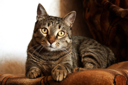

In [3]:
urls = []
for photo in photos:
    urls.append(photo.original)
# 下载猫照片
print(urls[0])
dest = 'images/cat.jpg'
download_url(urls[0], dest)
im = Image.open(dest)
im.to_thumb(128, 128)


这似乎效果很好，所以让我们使用fastai的download_images来下载我们每个搜索词的所有URL。我们将把每个放在一个单独的文件夹中：

In [4]:
bear_types = 'cat', 'dog', 'lion'
path = Path('animals')
if not path.exists():
    path.mkdir() 
    for o in bear_types:
        dest = (path/o)
        print(dest)
        dest.mkdir(exist_ok=True)
        results = api.search(f'{o} bear', page=10, results_per_page=50)
        page=0
        while True:
            # Get all photos in the page
            photos = api.get_entries()
            # For each photo print its properties
            for photo in photos:
                file_name = re.search(r"\/([^\/]+)$", photo.original).group(1)
                download_url(photo.small, dest.joinpath(file_name))
            # If there is no next page print the last page and end the loop
            if not api.has_next_page:
                print("Last page: ", api.page)
                break
            # Search next page
            page+=1
            if page >= 10:
                break
            api.search_next_page()

查看目录的图片文件

In [5]:
fns = get_image_files(path)
fns

(#406) [Path('animals/cat/animal-cat-kitten-funny-56857.jpeg'),Path('animals/cat/cat-animal-cat-portrait-cat-s-eyes-122437.jpeg'),Path('animals/cat/cat-animals-cats-portrait-of-cat.jpg'),Path('animals/cat/cat-british-shorthair-bkh-thoroughbred-162287.jpeg'),Path('animals/cat/cat-eyes-view-face-66292.jpeg'),Path('animals/cat/cat-fold-view-grey-fur.jpg'),Path('animals/cat/cat-kitten-pets-tom-cat-161005.jpeg'),Path('animals/cat/cat-portrait-eyes-animal-162216.jpeg'),Path('animals/cat/cat-red-cute-mackerel.jpg'),Path('animals/cat/cat-silhouette-cats-silhouette-cat-s-eyes.jpg')...]

> j:我很喜欢在Jupyter notebook上工作！逐步构建我想要的东西，并在每一步都检查我的工作，这是很容易的。我犯了很多错误，所以这对我真的很有帮助。。。

当我们从互联网上下载文件时，通常会有一些文件被破坏。让我们检查一下：

In [6]:
failed = verify_images(fns)
failed

(#0) []

要删除所有失败的图像，可以对每个图像使用取消链接。请注意，与大多数返回集合的fastai函数一样，verify_images返回类型为L的对象，其中包括map方法。这将在集合的每个元素上调用传递的函数：

In [7]:
failed.map(Path.unlink);

### 在Jupyter notebook中获取帮助
Jupyter笔记本非常适合进行实验和立即查看每个函数的结果，但它还提供了很多功能来帮助您了解如何使用不同的函数，甚至可以直接查看其源代码。例如，如果您在一个单元格中输入：

In [8]:
verify_images??

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      ~/.local/lib/python3.8/site-packages/fastai/vision/utils.py
Type:      function

将会弹出一个窗口显示：
```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```


这段话告诉我们函数接受的参数（fns），然后显示函数的源代码和所在的文件。从源代码中可以看出，它使用并行方式应用了verify_image函数，并且只保留了该函数结果为False的图像文件，这与文档字符串一致：它找到在fns中无法打开的图像。

以下是Jupyter Notebook中其他非常有用的功能：

1. 在任何时候，如果你不记得函数或参数名的确切拼写，你可以按Tab键获取自动完成建议。
2. 在函数的括号内部，同时按下Shift和Tab键将显示一个窗口，其中包含函数的签名和简短描述。连续按两次这些键将展开文档，连续按三次将在屏幕底部打开一个具有相同信息的完整窗口。
3. 在单元格中，输入?函数名并执行将打开一个窗口，其中包含函数的签名和简短描述。
4. 在单元格中，输入??函数名并执行将打开一个窗口，其中包含函数的签名、简短描述和源代码。
5. 如果你使用的是fastai库，我们为你添加了一个doc函数：在单元格中执行doc(函数名)将打开一个窗口，其中包含函数的签名、简短描述以及指向GitHub上源代码和库文档中完整函数文档的链接。
6. 与文档无关但仍非常有用的是：如果出现错误，你可以在任何时候键入%debug在下一个单元格中执行，以打开Python调试器，它将允许你检查每个变量的内容。

这些功能可以帮助你更好地理解和使用函数，并提供方便的方式来获取帮助和调试代码。

### 小结
在这个过程中需要注意的一点是：正如我们在<>中讨论的那样，模型只能反映用于训练它们的数据。而世界上充满了带有偏见的数据，这最终会反映在例如必应图像搜索（我们用来创建数据集）中。举个例子，假设你有兴趣创建一个能够帮助用户判断他们是否拥有健康皮肤的应用程序，所以你训练了一个模型，使用搜索结果中包含“健康皮肤”（例如）的图像作为数据。<>展示了你会得到的结果的种类。

![image](https://github.com/fastai/fastbook/blob/master/images/healthy_skin.gif?raw=1)

如果你使用这样的训练数据，最终你将得到的不是一个健康皮肤检测器，而是一个年轻白人女性触摸她的脸检测器！务必仔细考虑在实际应用中可能会出现的数据类型，并仔细检查以确保所有这些类型都反映在模型的源数据中。注脚：[感谢Deb Raji提出的“健康皮肤”示例。请参阅她的论文“可操作的审计：调查公开命名商业AI产品偏差性能结果的影响”以获取更多关于模型偏差的有趣见解。]

现在我们已经下载了一些数据，我们需要将其组织成适合模型训练的格式。在fastai中，这意味着创建一个称为DataLoaders的对象。

## 从数据到数据加载器
`DataLoaders`是一个简单的类，它只是存储你传递给它的`DataLoader`对象，并将它们作为`train`和`valid`可用。尽管它是一个非常简单的类，但在fastai中非常重要：它为你的模型提供数据。以下这四行代码提供了`DataLoaders`的关键功能（我们暂时跳过了一些其他次要的功能）：


```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

> 术语解释：DataLoaders：fastai中的一个类，用于存储传递给它的多个DataLoader对象，通常是一个训练集和一个验证集，尽管你可以根据需要拥有任意多个DataLoader对象。前两个DataLoader对象可以通过属性访问。

在本书的后面，你还将了解到Dataset和Datasets类，它们具有相同的关系。

要将我们下载的数据转换为DataLoaders对象，我们至少需要告诉fastai四件事情：

我们正在处理什么类型的数据
如何获取项目列表
如何为这些项目进行标记
如何创建验证集
到目前为止，我们已经看到了一些特定组合的工厂方法，当你的应用程序和数据结构恰好适应这些预定义方法时，这些方法非常方便。但当你的情况不满足这些预定义方法时，fastai还提供了一个极其灵活的系统，称为数据块API。使用这个API，你可以完全自定义DataLoaders的创建过程的每个阶段。以下是我们为刚刚下载的数据集创建DataLoaders所需要的内容：

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

让我们逐个查看这些参数。首先，我们提供一个元组，其中指定了独立变量和因变量的类型：

blocks=(ImageBlock, CategoryBlock)
独立变量是我们用来进行预测的内容，而因变量是我们的目标。在这种情况下，我们的独立变量是图像，而我们的因变量是每个图像的类别（动物的类型）。在本书的其余部分，我们还会看到许多其他类型的块。

对于这个DataLoaders，我们的底层项目将是文件路径。我们需要告诉fastai如何获取这些文件的列表。get_image_files函数接受一个路径，并返回该路径下所有图像的列表（默认递归查找）：

get_items=get_image_files
通常，你下载的数据集已经定义了验证集。有时候这是通过将训练集和验证集的图像放置在不同的文件夹中来实现的。有时候这是通过提供一个CSV文件，其中每个文件名与应该属于的数据集一起列出来的。有许多方法可以实现这一点，fastai提供了一个非常通用的方法，允许你使用其预定义的类之一，或者编写自己的类来处理。然而，在这种情况下，我们只是想随机划分我们的训练集和验证集。但是，我们希望每次运行这个notebook时都得到相同的训练/验证划分，因此我们固定了随机种子（计算机实际上并不知道如何生成真正的随机数，而只是创建看起来随机的数字列表；如果你每次都为该列表提供相同的起始点（称为种子），那么你将每次得到完全相同的列表）：

splitter=RandomSplitter(valid_pct=0.2, seed=42)

独立变量通常被称为 `x`，因变量通常被称为 `y`。在这里，我们告诉fastai要调用哪个函数来创建我们数据集中的标签：

```python
get_y=parent_label
```

`parent_label` 是fastai提供的一个函数，它简单地获取文件所在文件夹的名称。因为我们根据动物的类型将每个动物图像放入了不同的文件夹中，所以这将给我们提供所需的标签。

我们的图像大小都不同，这对于深度学习是一个问题：我们不是逐个输入模型，而是一次输入多个图像（我们称之为*mini-batch*）。为了将它们组合成一个大的数组（通常称为*张量*），然后通过我们的模型，它们都需要具有相同的大小。因此，我们需要添加一个转换，将这些图像调整为相同的大小。*Item transforms*是在每个单独项上运行的代码片段，无论它是图像、类别等。fastai包含许多预定义的转换；我们在这里使用了 `Resize` 转换：

```python
item_tfms=Resize(128)
```

这个命令给我们提供了一个 `DataBlock` 对象。这类似于创建 `DataLoaders` 的*模板*。我们仍然需要告诉fastai我们数据的实际来源——在这种情况下，即图像所在的路径：

In [10]:
dls = bears.dataloaders(path)

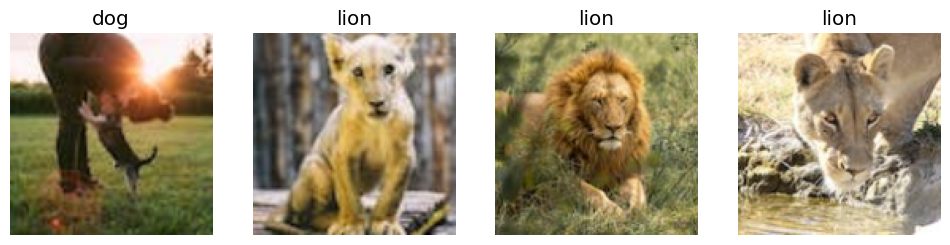

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

默认情况下，Resize会使用全宽或全高裁剪图像，使其适合所需大小的正方形。这可能会导致丢失一些重要的细节。或者，您可以要求fastai用零（黑色）填充图像，或者挤压/拉伸图像：

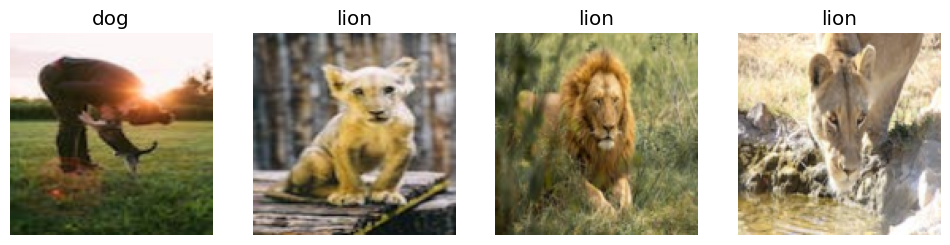

In [12]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

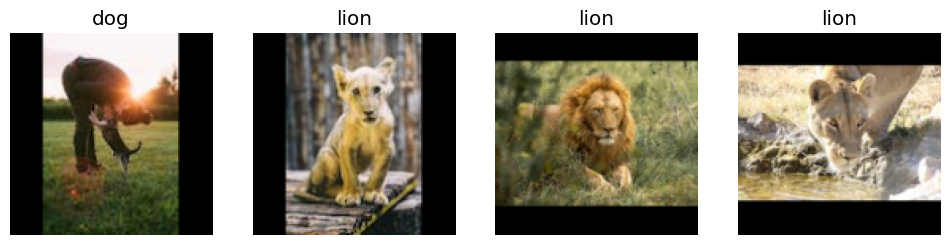

In [13]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

所有这些方法似乎都有些浪费或存在问题。如果我们压缩或拉伸图像，它们会变成不真实的形状，导致模型学习到物体与实际不同的外观，这会降低准确性。如果我们裁剪图像，那么我们就会丢失一些用于识别的特征。例如，如果我们试图识别狗或猫的品种，我们可能会裁剪掉区分相似品种所需的身体或面部的关键部分。如果我们填充图像，那么会有很多空白空间，这对于我们的模型来说只是浪费计算资源，并且会导致我们实际使用的图像部分的有效分辨率降低。

相反，在实践中我们通常的做法是随机选择图像的一部分，并裁剪成只有该部分。在每个epoch（完整遍历数据集中的所有图像的一次）中，我们随机选择每个图像的不同部分。这意味着我们的模型可以学习关注和识别图像中的不同特征。这也反映了图像在现实世界中的工作方式：同一物体的不同照片可能以稍微不同的方式构图。

事实上，一个完全未经训练的神经网络对图像的行为一无所知。它甚至不能识别当一个物体旋转一度时，它仍然是同一物体的图像！因此，用具有稍微不同位置和大小的物体图像的示例来训练神经网络实际上有助于它理解物体的基本概念，以及如何在图像中表示它。

以下是另一个例子，我们将Resize替换为RandomResizedCrop，这个转换提供了刚才描述的行为。传入的最重要参数是min_scale，它确定每次选择图像的最小部分有多大：

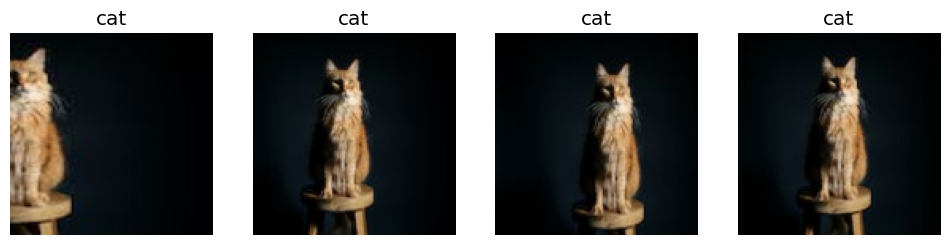

In [14]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

我们使用unique=True来使相同的图像在RandomResizedCrop变换的不同版本中重复出现。这是一种更通用的技术的具体示例，称为数据增强。

### 数据增强
数据增强是指创建输入数据的随机变化，使它们看起来不同，但实际上不改变数据的含义。对于图像而言，常见的数据增强技术包括旋转、翻转、透视变形、亮度变化和对比度变化。对于我们在这里使用的自然照片图像，我们发现一组标准的增强技术效果非常好，可以通过aug_transforms函数提供。因为现在我们的所有图像都是相同大小的，我们可以使用GPU将这些增强应用于整个批次的图像，这将节省大量时间。为了告诉fastai我们希望在批次上使用这些变换，我们使用batch_tfms参数（请注意，我们在这个示例中没有使用RandomResizedCrop，这样您可以更清楚地看到差异；出于同样的原因，我们使用的增强量是默认值的两倍）：

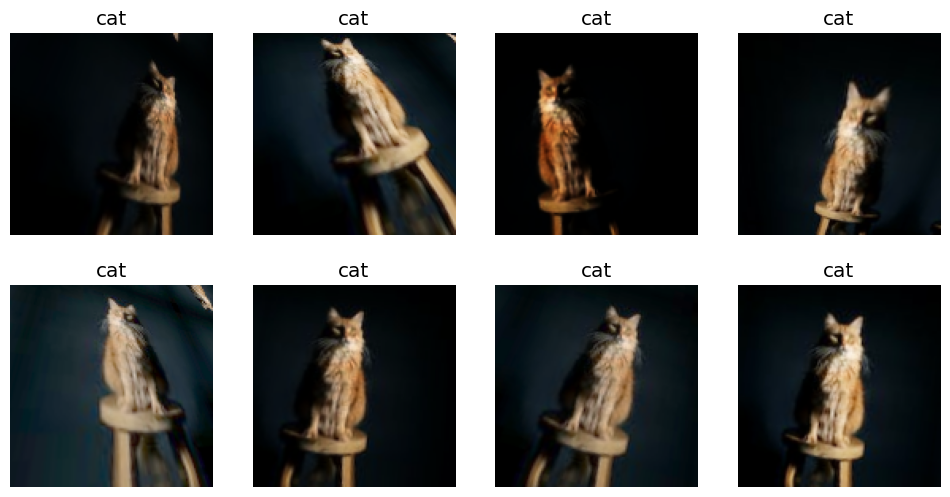

In [15]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

现在我们已经将数据组合成适合模型训练的格式，让我们实际训练一个图像分类器。

## 训练模型并用它清理数据
现在我们可以使用与<<chapter_intro>>中相同的代码行来训练我们的动物分类器。

对于我们的问题，我们没有很多数据（最多每类动物150张图片），因此为了训练我们的模型，我们将使用图像大小为224像素的RandomResizedCrop，这在图像分类中是相当标准的，并使用默认的aug_transforms：

In [16]:
bears=bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls=bears.dataloaders(path)

现在，我们可以创建学习器并以通常的方式对其进行微调：

In [17]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

现在让我们看看模型所犯的错误是什么？为了可视化这一点，我们可以创建一个混淆矩阵：

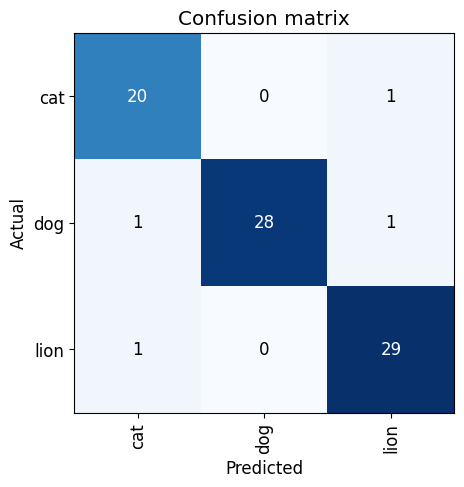

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

这个矩阵的行表示数据集的猫，狗，狮子。列表示模型预测为猫，狗，狮子的图片。所以矩阵对角线是被正确分类的图像，而非对角线的单元表示被错误分类的图像。这是fastai允许您查看模型结果的众多方式之一。这当然是使用验证集计算得出的。通过颜色编码，我们的目标是在对角线以外的地方呈现白色，在对角线上呈现深蓝色。我们的动物分类器没有犯太多错误！

了解错误发生的具体位置很有帮助，以确定是数据集问题（例如，根本不是动物的图像，或者标签错误等）还是模型问题（可能无法处理光线异常或不同角度拍摄的图像等）。为了做到这一点，我们可以通过损失（loss）对图像进行排序。

损失是一个数字，如果模型错误（尤其是如果模型对错误答案也有自信）或者模型答案是正确的但不自信，那么损失会较高。在接下来的几章中，我们将深入学习损失是如何计算和在训练过程中使用的。现在，plot_top_losses函数可以显示数据集中损失最高的图像。正如输出标题所说，每个图像都带有四个标签：预测值、实际值（目标标签）、损失和概率。这里的概率表示模型对其预测的置信度，范围从零到一。

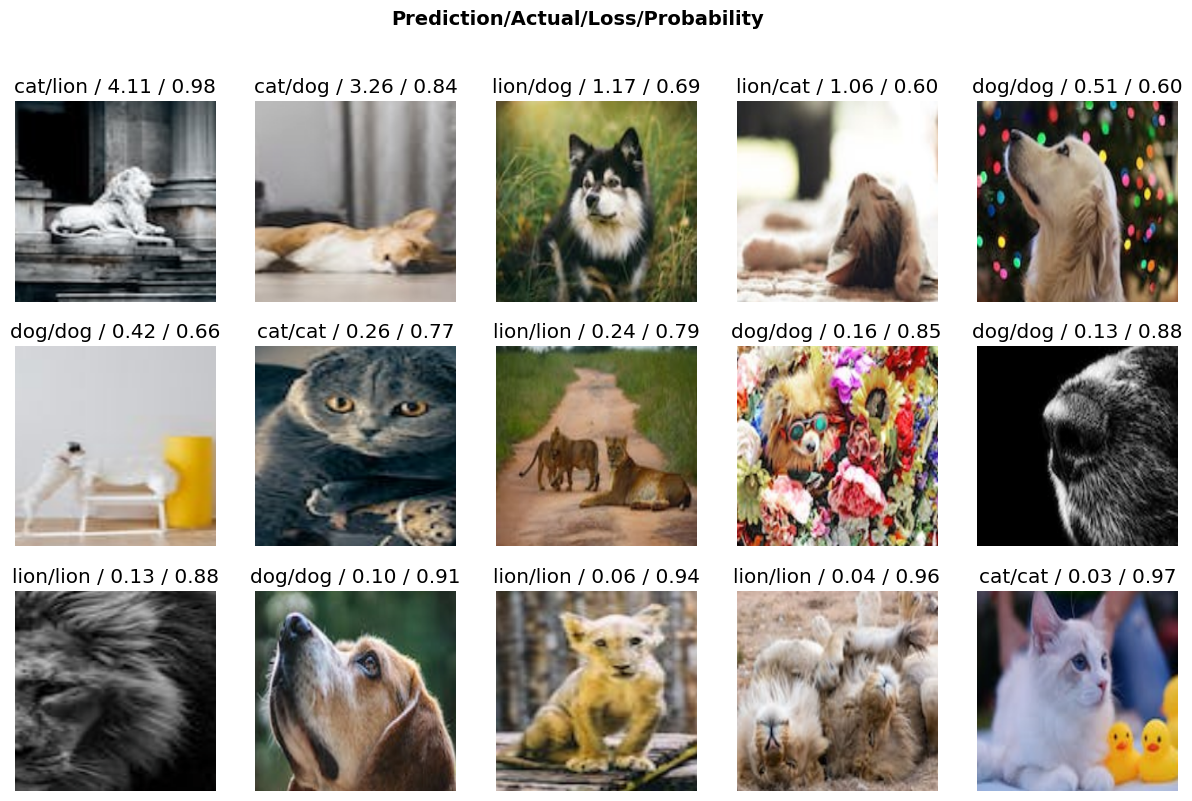

In [19]:
interp.plot_top_losses(15, nrows=3)

这个输出显示，损失最高的图像被高度自信地预测为“狗”。然而，根据我们的图像搜索结果，它的标签是“狮子”。虽然我们不是动物专家，但对我们来说，这个标签显然是错误的！这应该是个纹了狮子的人。

进行数据清洗的直观方法是在训练模型之前进行。但正如您在这个案例中看到的，模型实际上可以帮助您更快、更轻松地发现数据问题。因此，通常我们更喜欢先训练一个快速简单的模型，然后利用它来帮助我们进行数据清洗。

fastai提供了一个方便的图形用户界面（GUI）用于数据清洗，名为ImageClassifierCleaner。它允许您选择一个类别和训练集与验证集，并查看最高损失的图像（按顺序），同时提供菜单选项，可以选择删除或重新标记图像。

In [20]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

在我们的“lion”类别中，我们可以看到一张包含两只熊的图像：一个是印花。所以，在该图像下的菜单中，我们应选择<Delete>（删除）。ImageClassifierCleaner并不直接执行删除或更改标签的操作；它只返回要更改的项目的索引。因此，例如，要删除所有选定要删除的图像，我们可以运行以下代码：

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

要将我们选择了不同类别的图像移动到其他目录，我们可以运行以下代码：

```python
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> 清理数据并为模型准备数据是数据科学家面临的两个最大挑战之一；据说这占据了他们90%的时间。fastai库旨在提供尽可能简单易用的工具来解决这些问题。

在本书的其他部分中，我们还将看到更多基于模型的数据清洗的示例。一旦我们清理了数据，就可以重新训练我们的模型。尝试自己动手操作，看看准确率是否有所提高！
> 注意：无需大数据量：在使用这些步骤清理数据集后，通常我们在这个任务上看到了100%的准确率。即使我们下载的图像数量比这里每类使用的150张要少得多，我们仍然能够看到这样的结果。正如您所看到的，关于进行深度学习需要大量数据的常见说法可能与事实相去甚远！
现在我们已经训练了我们的模型，让我们看看如何将其部署以供实际使用。

## 将您的模型转化为在线应用程序
我们现在要看看将这个模型转化为一个可工作的在线应用程序需要哪些步骤。我们只会创建一个基本的工作原型，本书的范围不足以教授您网页应用程序开发的所有细节。

### 使用模型进行推断
获得满意的模型后，您需要保存它，以便随后可以将其复制到您将在生产中使用它的服务器。请记住，模型由两部分组成：*架构* 和经过训练的*参数*。保存模型的最简单方法是同时保存这两个模型，因为这样在加载模型时可以确保您拥有匹配的体系结构和参数。要保存这两个部分，请使用“导出”方法。

这个方法甚至保存了如何创建你的“DataLoaders”的定义。这很重要，因为否则您必须重新定义如何转换数据才能在生产中使用您的模型。默认情况下，fastai 会自动使用您的验证集“DataLoader”进行推理，因此不会应用您的数据扩充，这通常是您想要的。

当你调用 `export` 时，fastai 将保存一个名为“export.pkl”的文件：

In [22]:
learn.export()

无论您将应用程序部署到何处，您都需要此文件。现在，让我们尝试在笔记本中创建一个简单的应用程序。

当我们使用模型进行预测而不是训练时，我们将其称为推理。为了从导出的文件创建我们的推理学习器，我们使用 load_learner（在这种情况下，这并不是必需的，因为我们的笔记本中已经有一个可用的 Learner；我们只是在这里做，所以你可以查看端到端的整个过程）：

In [23]:
learn_inf = load_learner(path/'../export.pkl')

当我们进行推理时，我们通常一次只对一张图像进行预测。为此，将文件名传递给“predict”：

In [24]:
learn_inf.predict('images/cat.jpg')

('cat', tensor(0), tensor([9.9995e-01, 3.7581e-08, 4.6053e-05]))

这返回了三项内容：与您最初提供的格式相同的预测类别（在本例中为字符串）、预测类别的索引以及每个类别的概率。最后两个是基于 DataLoaders 的 vocab 中类别的顺序；即所有可能类别的存储列表。在推理时，您可以将 DataLoaders 作为 Learner 的属性进行访问：

In [25]:
learn_inf.dls.vocab

['cat', 'dog', 'lion']

我们可以在这里看到，如果我们用`predict`返回的整数对词汇表进行索引，那么我们会按预期返回"cat"。另外请注意，如果我们对概率列表进行索引，我们会看到这是一只灰熊的概率接近 1.00。

我们知道如何根据保存的模型进行预测，因此我们拥有开始构建应用程序所需的一切。我们可以直接在 Jupyter Notebook 中完成。

### 从模型创建笔记本应用
要在应用程序中使用我们的模型，我们可以简单地将“预测”方法视为常规函数。因此，可以使用应用程序开发人员可用的无数框架和技术中的任何一种来从模型创建应用程序。

然而，大多数数据科学家并不熟悉 Web 应用程序开发领域。因此，让我们尝试使用您所做的事情，在这一点上，知道：事实证明，我们可以只使用 Jupyter 笔记本创建一个完整的工作 Web 应用程序！我们需要做的两件事是：
* IPython widgets (ipywidgets)
* Voilà

IPython widgets是GUI组件，在Web浏览器中将JavaScript和Python功能结合在一起，可以在 Jupyter notebook 中创建和使用。例如，我们在本章前面看到的图像清理器完全是用 IPython widges编写的。但是，我们不想要求我们应用程序的用户自己运行 Jupyter。

这就是 Voilà 存在的原因。它是一个使最终用户可以使用由 IPython 小部件组成的应用程序的系统，而他们根本不必使用 Jupyter。 Voilà 正在利用笔记本_已经是_一种网络应用程序这一事实，它只是一个相当复杂的应用程序，它依赖于另一个网络应用程序：Jupyter 本身。从本质上讲，它帮助我们自动将我们已经隐式制作的复杂 Web 应用程序（notebook）转换为更简单、更易于部署的 Web 应用程序，其功能更像普通的 Web 应用程序，而不是像 notebook。

但是我们仍然有在笔记本上开发的优势，所以通过ipywidgets，我们可以一步步构建我们的GUI。我们将使用这种方法来创建一个简单的图像分类器。首先，我们需要一个文件上传小部件：

In [26]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

现在我们可以抓取图像了：

In [27]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/cat.jpg'])

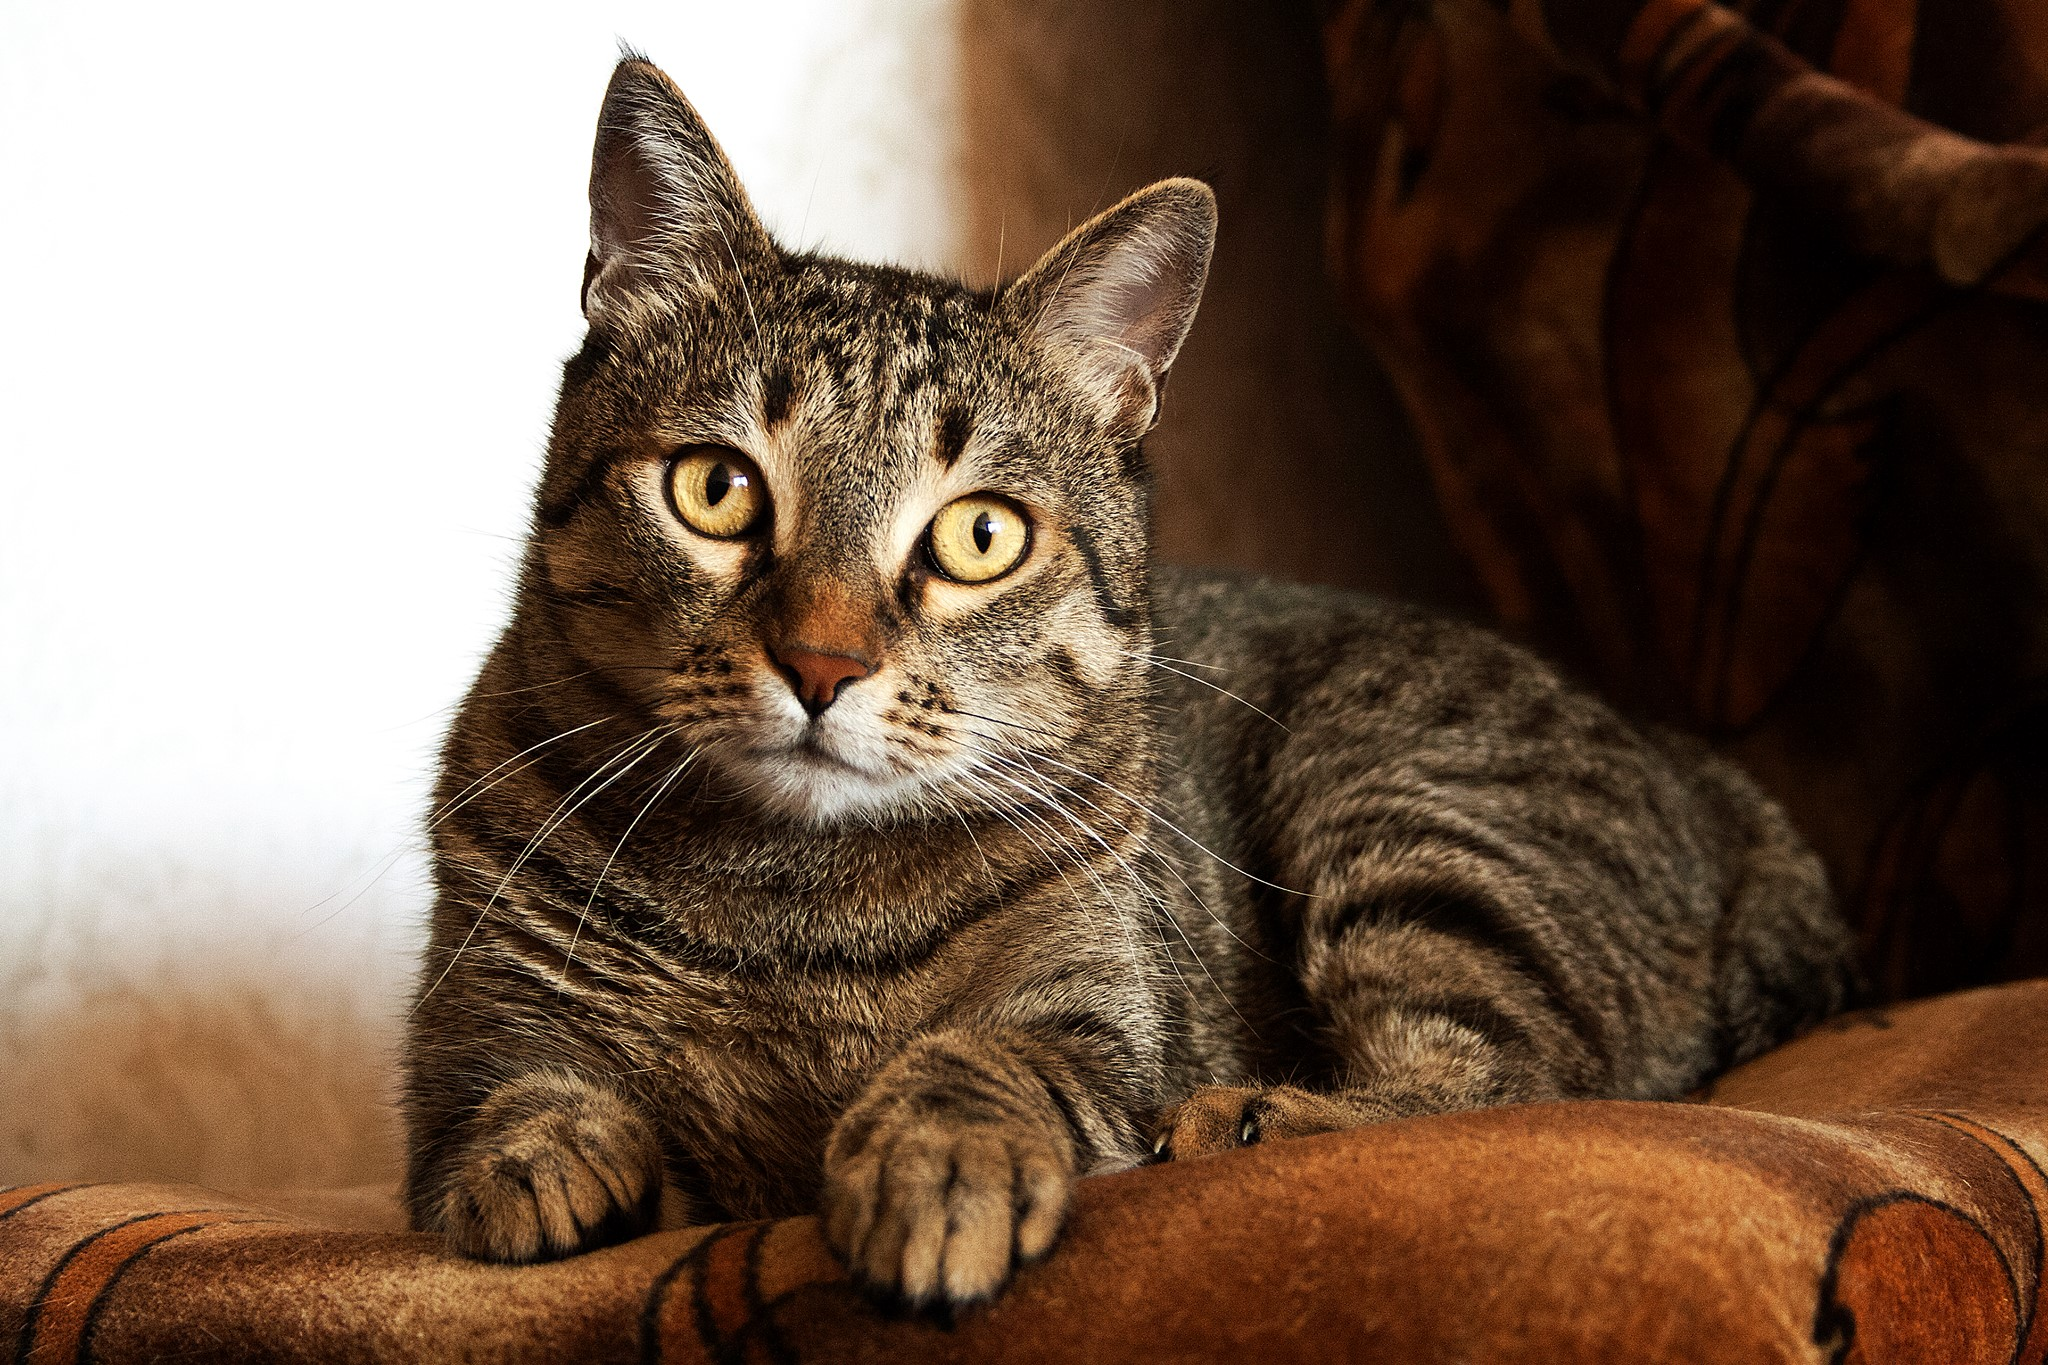

In [28]:
img = PILImage.create(btn_upload.data[-1])
img

我们可以使用 Output 组件来显示它：

In [29]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl:
    display(img.to_thumb(128, 128))
out_pl

Output()

In [30]:
pred,pred_idx,probs = learn_inf.predict(img)
pred, pred_idx, probs

('cat', tensor(0), tensor([9.9995e-01, 3.7581e-08, 4.6053e-05]))

并使用 Label 来显示它们：

In [31]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cat; Probability: 1.0000')

我们需要一个按钮来进行分类。它看起来和上传按钮一模一样：

In [32]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

我们还需要一个点击事件处理程序；即，按下时将调用的函数。我们可以从上面复制代码行：

In [33]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction:{pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

您现在可以通过按下按钮来测试它，您应该会看到图像和预测自动更新！

我们现在可以将它们全部放在一个垂直框 (VBox) 中以完成我们的 GUI：

In [34]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your annimal!'), btn_upload, btn_run, out_pl, lbl_pred])

我们已经编写了应用程序所需的所有代码。下一步是将其转换为我们可以部署的东西。